In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


This notebook spawned from: http://localhost:5000/notebooks/Projects/hla_ii/data_analysis/patient_selection/helper_II.ipynb

### Set up analysis

DRB comparison

In [2]:
clinical = pd.read_csv('/cellar/users/ramarty/Data/kir/TCGA/clinical_df.csv',
                       index_col=0)

In [3]:
clinical.gender.value_counts()

FEMALE    5724
MALE      5235
Name: gender, dtype: int64

In [4]:
hla_types = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/hla_types.tcga.csv',
            index_col=0)

In [5]:
def DRB1_homozygous(x):
    if x[0] == x[1]:
        return True
    else:
        return False
hla_types['DRB1_homozygosity'] = hla_types[['DRB1_allele1', 'DRB1_allele2']].apply(DRB1_homozygous, axis=1)

In [6]:
hla_types.head()

,DPA1_allele1,DPA1_allele2,DPB1_allele1,DPB1_allele2,DQA1_allele1,DQA1_allele2,DQB1_allele1,DQB1_allele2,DRB1_allele1,DRB1_allele2,DRB1_homozygosity
TCGA-02-0003,DPA10103,DPA10103,DPB10402,DPB10201,DQA10102,DQA10303,DQB10602,DQB10301,DRB1_1501,DRB1_0401,False
TCGA-02-0033,DPA10103,DPA10103,DPB10402,DPB10402,DQA10505,DQA10301,DQB10302,DQB10301,DRB1_1104,DRB1_0404,False
TCGA-02-0047,DPA10103,DPA10103,DPB10402,DPB11501\n,DQA10301,DQA10501,DQB10201,DQB10302,DRB1_0301,DRB1_0401,False
TCGA-02-0055,DPA10103,DPA10103,DPB10402,DPB10401,DQA10505,DQA10301,DQB10301,DQB10301,DRB1_1101,DRB1_0407,False
TCGA-02-2466,DPA10103,DPA10103,DPB10201,DPB10401,DQA10501,DQA10101,DQB10501,DQB10201,DRB1_0301,DRB1_0101,False


In [7]:
df = pd.merge(clinical, hla_types, left_index=True, right_index=True, how='outer')

In [98]:
df.columns

Index([u'age_at_diagnosis', u'days_to_death', u'days_to_last_followup',
       u'ethnicity', u'gender', u'race', u'tissue', u'vital_status',
       u'DPA1_allele1', u'DPA1_allele2', u'DPB1_allele1', u'DPB1_allele2',
       u'DQA1_allele1', u'DQA1_allele2', u'DQB1_allele1', u'DQB1_allele2',
       u'DRB1_allele1', u'DRB1_allele2', u'DRB1_homozygosity'],
      dtype='object')

In [8]:
df.to_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.clinical.csv')

In [99]:
gender, homozygosity, percentage_of_sex = [], [], []
df_min = df[['DRB1_homozygosity', 'gender']].dropna()
for hom_count in [True, False]:
    print "hom_count", hom_count
    for gen in ['MALE', 'FEMALE']:
        print gen, list(df_min[(df_min.DRB1_homozygosity == hom_count)&(df_min.gender == gen)].gender.value_counts() \
                        / len(df_min[df_min.gender == gen]))[0]
        gender.append(gen)
        homozygosity.append(hom_count)
        percentage_of_sex.append(list(df_min[(df_min.DRB1_homozygosity == hom_count)&(df_min.gender == gen)].gender.value_counts() \
                        / len(df_min[df_min.gender == gen]))[0])

hom_count True
MALE 0.0833147196784
FEMALE 0.0920143686101
hom_count False
MALE 0.916685280322
FEMALE 0.90798563139


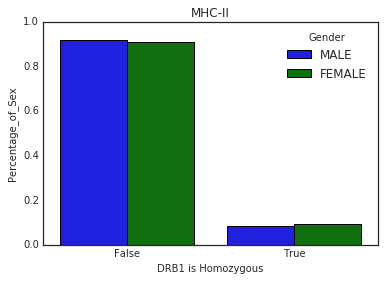

In [100]:
tmp = pd.DataFrame({'Gender': gender,
                    'Homozygosity_Level': homozygosity,
                    'Percentage_of_Sex': percentage_of_sex})
sns.barplot(x='Homozygosity_Level', y='Percentage_of_Sex', hue='Gender', data=tmp)
plt.title('MHC-II')
plt.xlabel('DRB1 is Homozygous')

Comparison of all genes

In [101]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                 index_col=0)
df = df.dropna()
df = pd.merge(df, clinical, left_index=True, right_index=True, how='outer')

In [104]:
df.groupby(['homozygous_classII', 'gender']).count()

classI  classII  Tissue   Age  Race  \
homozygous_classII gender                                        
0.0                FEMALE     696      696     696   696   696   
                   MALE       902      902     902   902   902   
1.0                FEMALE     996      996     996   996   996   
                   MALE      1238     1238    1238  1238  1238   
2.0                FEMALE     497      497     497   497   497   
                   MALE       671      671     671   671   671   
3.0                FEMALE     122      122     122   122   122   
                   MALE       157      157     157   157   157   
4.0                FEMALE      69       69      69    69    69   
                   MALE        87       87      87    87    87   
5.0                FEMALE      37       37      37    37    37   
                   MALE        26       26      26    26    26   

                           homozygous_classI  homozygous_total  \
homozygous_classII gender                                        
0.0                FEMALE                696               696   
                   MALE                  902               902   
1.0                FEMALE                996               996   
                   MALE                 1238              1238   
2.0                FEMALE                497               497   
                   MALE                  671               671   
3.0                FEMALE                122               122   
                   MALE                  157               157   
4.0                FEMALE                 69                69   
                   MALE                   87                87   
5.0                FEMALE                 37                37   
                   MALE                   26                26   

                           passenger_coverageI  passenger_coverageII  \
homozygous_classII gender                                              
0.0                FEMALE                  696                   696   
                   MALE                    902                   902   
1.0                FEMALE                  996                   996   
                   MALE                   1238                  1238   
2.0                FEMALE                  497                   497   
                   MALE                    671                   671   
3.0                FEMALE                  122                   122   
                   MALE                    157                   157   
4.0                FEMALE                   69                    69   
                   MALE                     87                    87   
5.0                FEMALE                   37                    37   
                   MALE                     26                    26   

                           classI_cat  classII_cat  classI_het  classII_het  \
homozygous_classII gender                                                     
0.0                FEMALE         696          696         696          696   
                   MALE           902          902         902          902   
1.0                FEMALE         996          996         996          996   
                   MALE          1238         1238        1238         1238   
2.0                FEMALE         497          497         497          497   
                   MALE           671          671         671          671   
3.0                FEMALE         122          122         122          122   
                   MALE           157          157         157          157   
4.0                FEMALE          69           69          69           69   
                   MALE            87           87          87           87   
5.0                FEMALE          37           37          37           37   
                   MALE            26           26          26           26   

                           age_at_diagnosis  days_to_death  \

In [105]:
gender, homozygosity, percentage_of_sex = [], [], []
df_min = df[['homozygous_classI', 'gender']].dropna()
for hom_count in range(4):
    print "hom_count", hom_count
    for gen in ['MALE', 'FEMALE']:
        print gen, list(df_min[(df_min.homozygous_classI == hom_count)&(df_min.gender == gen)].gender.value_counts() \
                        / len(df_min[df_min.gender == gen]))[0]
        gender.append(gen)
        homozygosity.append(hom_count)
        percentage_of_sex.append(list(df_min[(df_min.homozygous_classI == hom_count)&(df_min.gender == gen)].gender.value_counts() \
                        / len(df_min[df_min.gender == gen]))[0])

hom_count 0
MALE 0.763713080169
FEMALE 0.729002896152
hom_count 1
MALE 0.170723790977
FEMALE 0.199007033513
hom_count 2
MALE 0.0412203829925
FEMALE 0.0496483243691
hom_count 3
MALE 0.0243427458617
FEMALE 0.0223417459661


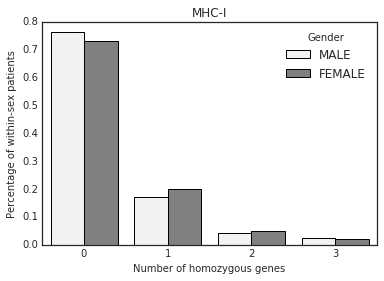

In [106]:
tmp = pd.DataFrame({'Gender': gender,
                    'Homozygosity_Level': homozygosity,
                    'Percentage_of_Sex': percentage_of_sex})

sns.barplot(x='Homozygosity_Level', y='Percentage_of_Sex', hue='Gender', data=tmp,
           color='grey')
plt.title('MHC-I')
plt.ylabel('Percentage of within-sex patients')
plt.xlabel('Number of homozygous genes')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/homozygosity_distribution.MHCI.pdf')

In [107]:
sp.mannwhitneyu(tmp[tmp.Gender == 'MALE'].Homozygosity_Level,
                tmp[tmp.Gender == 'FEMALE'].Homozygosity_Level)

MannwhitneyuResult(statistic=8.0, pvalue=0.44121005703775179)

In [108]:
df.columns

Index([u'classI', u'classII', u'Tissue', u'Age', u'Race', u'homozygous_classI',
       u'homozygous_classII', u'homozygous_total', u'passenger_coverageI',
       u'passenger_coverageII', u'classI_cat', u'classII_cat', u'classI_het',
       u'classII_het', u'age_at_diagnosis', u'days_to_death',
       u'days_to_last_followup', u'ethnicity', u'gender', u'race', u'tissue',
       u'vital_status'],
      dtype='object')

In [109]:
gender, homozygosity, percentage_of_sex = [], [], []
df_min = df[['homozygous_classII', 'gender']].dropna()
for hom_count in range(6):
    print "hom_count", hom_count
    for gen in ['MALE', 'FEMALE']:
        print gen, list(df_min[(df_min.homozygous_classII == hom_count)&(df_min.gender == gen)].gender.value_counts() \
                        / len(df_min[df_min.gender == gen]))[0]
        gender.append(gen)
        homozygosity.append(hom_count)
        percentage_of_sex.append(list(df_min[(df_min.homozygous_classII == hom_count)&(df_min.gender == gen)].gender.value_counts() \
                        / len(df_min[df_min.gender == gen]))[0])

hom_count 0
MALE 0.29276209023
FEMALE 0.287960281341
hom_count 1
MALE 0.401817591691
FEMALE 0.412081092263
hom_count 2
MALE 0.217786432976
FEMALE 0.205626810095
hom_count 3
MALE 0.0509574813372
FEMALE 0.0504757964419
hom_count 4
MALE 0.0282375851996
FEMALE 0.0285477865122
hom_count 5
MALE 0.0084388185654
FEMALE 0.0153082333471


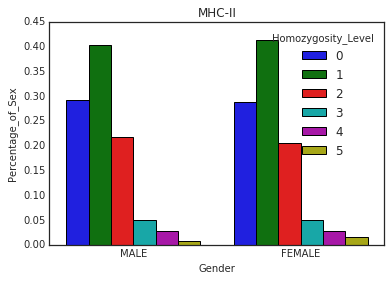

In [110]:
tmp = pd.DataFrame({'Gender': gender,
                    'Homozygosity_Level': homozygosity,
                    'Percentage_of_Sex': percentage_of_sex})
sns.barplot(x='Gender', y='Percentage_of_Sex', hue='Homozygosity_Level', data=tmp)
plt.title('MHC-II')

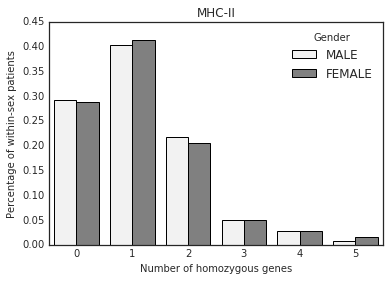

In [111]:
sns.barplot(x='Homozygosity_Level', y='Percentage_of_Sex', hue='Gender', data=tmp,
           color='grey')
plt.title('MHC-II')
plt.ylabel('Percentage of within-sex patients')
plt.xlabel('Number of homozygous genes')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/homozygosity_distribution.MHCII.pdf')

In [112]:
sp.mannwhitneyu(tmp[tmp.Gender == 'MALE'].Homozygosity_Level,
                tmp[tmp.Gender == 'FEMALE'].Homozygosity_Level)

MannwhitneyuResult(statistic=18.0, pvalue=0.46775383722680897)

In [113]:
df.columns

Index([u'classI', u'classII', u'Tissue', u'Age', u'Race', u'homozygous_classI',
       u'homozygous_classII', u'homozygous_total', u'passenger_coverageI',
       u'passenger_coverageII', u'classI_cat', u'classII_cat', u'classI_het',
       u'classII_het', u'age_at_diagnosis', u'days_to_death',
       u'days_to_last_followup', u'ethnicity', u'gender', u'race', u'tissue',
       u'vital_status'],
      dtype='object')

MannwhitneyuResult(statistic=3690982.0, pvalue=0.28934078474498148)


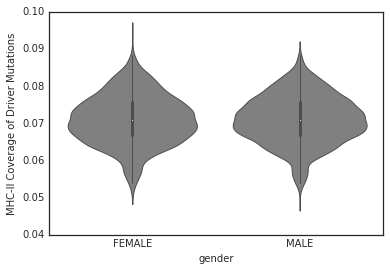

In [114]:
print sp.mannwhitneyu(df[df.gender == 'FEMALE'].classII.dropna(),
                      df[df.gender == 'MALE'].classII.dropna())
sns.violinplot(x='gender', y='classII', data=df, color='grey')
plt.ylabel('MHC-II Coverage of Driver Mutations')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/coverage_distribution.MHCII.pdf')

MannwhitneyuResult(statistic=3721665.5, pvalue=0.48823701793236102)


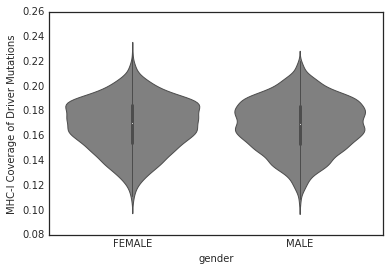

In [115]:
print sp.mannwhitneyu(df[df.gender == 'FEMALE'].classI.dropna(),
                      df[df.gender == 'MALE'].classI.dropna())
sns.violinplot(x='gender', y='classI', data=df, color='grey')
plt.ylabel('MHC-I Coverage of Driver Mutations')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/coverage_distribution.MHCI.pdf')

In [116]:
df_min.gender.value_counts()

MALE      3081
FEMALE    2417
Name: gender, dtype: int64

Make data frames (affinities, mutations, tissuse)

In [117]:
class_label = 'class_i'
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.{0}.csv'.format(class_label),
                                 index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_mutations.csv',
                                 index_col=0)
fem = [x for x in df[df.gender == 'FEMALE'].index if x in patient_affinities.index]
mal = [x for x in df[df.gender == 'MALE'].index if x in patient_affinities.index]
print len(fem), len(mal)
out = '/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/'
patient_affinities.ix[mal].to_csv(out + 'patient_affinities.{0}.male.csv'.format(class_label))
patient_affinities.ix[fem].to_csv(out + 'patient_affinities.{0}.female.csv'.format(class_label))

patient_mutations.ix[mal].to_csv(out + 'patient_mutations.{0}.male.csv'.format(class_label))
patient_mutations.ix[fem].to_csv(out + 'patient_mutations.{0}.female.csv'.format(class_label))

2912 3999


Run OR

In [28]:
def create_cluster_script(thresholds, models, tissue_fs, mut_fs, aff1_fs, aff2_fs, names, pans):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/OR.gender.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        #out_file.write("#$ -t 1-4\n".format(len(thresholds)))
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=30G\n")
        out_file.write("#$ -tc 100\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set models=({0})\n".format(" ".join(models)))
        out_file.write("set tissue_fs=({0})\n".format(" ".join(tissue_fs)))
        out_file.write("set mut_fs=({0})\n".format(" ".join(mut_fs)))
        out_file.write("set aff1_fs=({0})\n".format(" ".join(aff1_fs)))
        out_file.write("set aff2_fs=({0})\n".format(" ".join(aff2_fs)))
        out_file.write("set names=({0})\n".format(" ".join(names)))
        out_file.write("set pans=({0})\n".format(" ".join(pans)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set model=$models[$SGE_TASK_ID]\n")
        out_file.write("set tissue_f=$tissue_fs[$SGE_TASK_ID]\n")
        out_file.write("set mut_f=$mut_fs[$SGE_TASK_ID]\n")
        out_file.write("set aff1_f=$aff1_fs[$SGE_TASK_ID]\n")
        out_file.write("set aff2_f=$aff2_fs[$SGE_TASK_ID]\n")
        out_file.write("set name=$names[$SGE_TASK_ID]\n")
        out_file.write("set pan=$pans[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/OR.R $threshold $model $tissue_f $mut_f $aff1_f $aff2_f $name $pan\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [29]:
# first MHC-II only (driver, passenger, germline); then both (driver, passenger, germline)
class_label = 'class_i'
models = ['0']*2
pans = ['0']*2
thresholds = ['2']*2
tissue_fs = ['patient_tissues.csv']*8
mut_fs = ['combined_classes/patient_mutations.{0}.male.csv'.format(class_label),
           'combined_classes/patient_mutations.{0}.female.csv'.format(class_label)]*2
aff1_fs = ['combined_classes/patient_affinities.{0}.male.csv'.format(class_label),
           'combined_classes/patient_affinities.{0}.female.csv'.format(class_label)]*2
# these are never referenced
aff2_fs = (['patient_affinities.cancer.all.csv', 'patient_affinities.passenger.csv'])*2
names = ['{0}.male'.format(class_label), 
         '{0}.female'.format(class_label)]*2

create_cluster_script(thresholds, models, tissue_fs, mut_fs, aff1_fs, aff2_fs, names, pans)

### Results

Pan

In [30]:
MI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_i.male.txt',
           sep= ' ')
FI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_i.female.txt',
           sep= ' ')
MI['Class'] = 'I'
FI['Class'] = 'I'
MI['Gender'] = 'Male'
FI['Gender'] = 'Female'

Pan - class II

In [31]:
MII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_ii.male.txt',
           sep= ' ')
FII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.pan.thresh_2.class_ii.female.txt',
           sep= ' ')
MII['Class'] = 'II'
FII['Class'] = 'II'
MII['Gender'] = 'Male'
FII['Gender'] = 'Female'

In [32]:
a = pd.concat([MI, FI, MII, FII])

(0.8, 1.5)

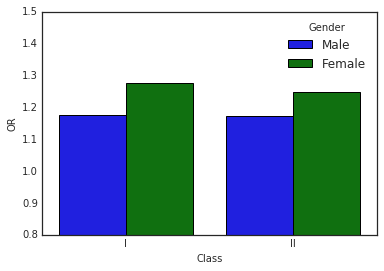

In [33]:
sns.barplot(x='Class', y='OR', hue='Gender', data=a)
plt.ylim(0.8, 1.5)

Tissue

In [34]:
FI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_i.female.txt',
           sep= ',').sort_values('OR', ascending=False)
MI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_i.male.txt',
           sep= ',').sort_values('OR', ascending=False)
FI['Gender'] = 'Female'
MI['Gender'] = 'Male'
I = pd.concat([FI, MI])
I['Tissue'] = I.index

In [35]:
I.head()

,OR,Lci,Hci,P,Gender,Tissue
THCA,2.493216,2.170792,2.863528,3.035572e-38,Female,THCA
LGG,1.574992,1.408584,1.761059,1.546095e-15,Female,LGG
SKCM,1.405702,1.244156,1.588223,4.567930e-08,Female,SKCM
READ,1.367116,1.059770,1.763595,1.609221e-02,Female,READ
COAD,1.307421,1.176218,1.453259,6.759880e-07,Female,COAD


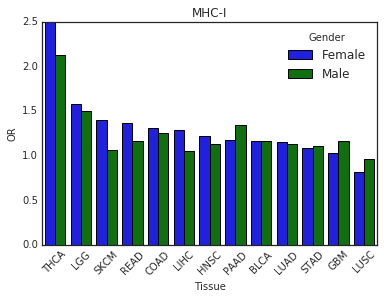

In [36]:
sns.barplot(x='Tissue', y='OR', hue='Gender', data=I)
plt.xticks(rotation=45)
plt.title('MHC-I')

In [37]:
FII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_ii.female.txt',
           sep= ',').sort_values('OR', ascending=False)
MII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR/MHC_II.tissue.thresh_2.class_ii.male.txt',
           sep= ',').sort_values('OR', ascending=False)
FII['Gender'] = 'Female'
MII['Gender'] = 'Male'
II = pd.concat([FII, MII])
II['Tissue'] = II.index

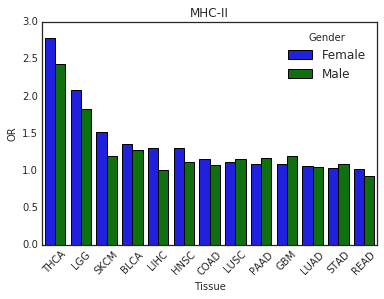

In [38]:
sns.barplot(x='Tissue', y='OR', hue='Gender', data=II)
plt.xticks(rotation=45)
plt.title('MHC-II')

Sex-specific age at diagnosis differences

In [39]:
df.columns

Index([u'classI', u'classII', u'Tissue', u'Age', u'Race', u'homozygous_classI',
       u'homozygous_classII', u'homozygous_total', u'passenger_coverageI',
       u'passenger_coverageII', u'classI_cat', u'classII_cat', u'classI_het',
       u'classII_het', u'age_at_diagnosis', u'days_to_death',
       u'days_to_last_followup', u'ethnicity', u'gender', u'race', u'tissue',
       u'vital_status'],
      dtype='object')

In [40]:
df_dropped = df.dropna() 

In [41]:
comparable_tissues = []
for tissue in df_dropped.tissue.unique():
    df_tissue = df_dropped[df_dropped.tissue == tissue]
    if (len(df_tissue[df_tissue.gender == 'FEMALE']) > 10) & (len(df_tissue[df_tissue.gender == 'MALE']) > 10):
        print tissue, sp.mannwhitneyu(df_tissue[df_tissue.gender == 'FEMALE'].Age,
                                      df_tissue[df_tissue.gender == 'MALE'].Age)
        comparable_tissues.append(tissue)

GBM MannwhitneyuResult(statistic=8359.0, pvalue=0.27512029699315765)
LUSC MannwhitneyuResult(statistic=3219.5, pvalue=0.0069893512229541217)
BLCA MannwhitneyuResult(statistic=4916.5, pvalue=0.028725966151854562)
KIRP MannwhitneyuResult(statistic=3624.0, pvalue=0.31989156301599408)
LIHC MannwhitneyuResult(statistic=5425.5, pvalue=0.06771445023245555)
LUAD MannwhitneyuResult(statistic=10660.5, pvalue=0.49779120739059568)
PAAD MannwhitneyuResult(statistic=803.0, pvalue=0.30011097499448902)
STAD MannwhitneyuResult(statistic=6911.0, pvalue=0.077365468209291313)
SKCM MannwhitneyuResult(statistic=8665.0, pvalue=0.42882235111304035)
THCA MannwhitneyuResult(statistic=9270.0, pvalue=0.023172935715374147)
COAD MannwhitneyuResult(statistic=4626.5, pvalue=0.014105466087790966)
HNSC MannwhitneyuResult(statistic=6826.5, pvalue=0.033671437242856414)
KIRC MannwhitneyuResult(statistic=2035.0, pvalue=0.055973325345733155)
READ MannwhitneyuResult(statistic=459.5, pvalue=0.048121863266716594)
LGG Mannwhitn

In [42]:
sp.mannwhitneyu(df_dropped[df_dropped.gender == 'FEMALE'].Age,
                df_dropped[df_dropped.gender == 'MALE'].Age)

MannwhitneyuResult(statistic=1795111.0, pvalue=0.00024774179489000234)

In [43]:
print df_dropped[df_dropped.gender == 'FEMALE'].Age.mean()
print df_dropped[df_dropped.gender == 'MALE'].Age.mean()

57.5886112725
59.4578475336


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

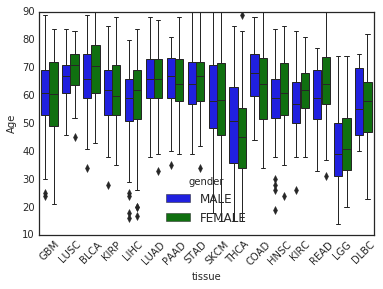

In [44]:
sns.boxplot(x='tissue', y='Age', hue='gender', data=df_dropped[df_dropped.tissue.isin(comparable_tissues)])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

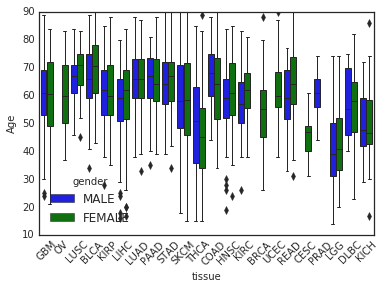

In [45]:
sns.boxplot(x='tissue', y='Age', hue='gender', data=df_dropped)
plt.xticks(rotation=45)

In [46]:
df.dropna().tissue.unique()

array(['GBM', 'OV', 'LUSC', 'BLCA', 'KIRP', 'LIHC', 'LUAD', 'PAAD', 'STAD',
       'SKCM', 'THCA', 'COAD', 'HNSC', 'KIRC', 'BRCA', 'UCEC', 'READ',
       'CESC', 'PRAD', 'LGG', 'DLBC', 'KICH'], dtype=object)

Check the polysolver file for discrepency in HLA mutations (/cellar/users/ramarty/Data/hla_ii/hla_types/polysolver_mutations.csv)

In [47]:
polysolver = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/polysolver_mutations.csv',
                         sep='\t')

In [56]:
polysolver['tissue'] = [x.split('-')[0] for x in polysolver.Sample]
polysolver.index = ['-'.join(x.split('-')[1:]) for x in polysolver.Sample]

In [66]:
polysolver_tissues = [x for x in polysolver.tissue.unique() if x not in ['BRCA', 'OV', 'PRAD']]

In [67]:
polysolver_tissues

['BLCA',
 'CESC',
 'COAD',
 'GBM',
 'HNSC',
 'KIRC',
 'KIRP',
 'LGG',
 'LUAD',
 'LUSC',
 'READ',
 'SKCM',
 'STAD',
 'THCA',
 'UCEC']

In [68]:
df_polysolver = df[df.tissue.isin(polysolver_tissues)]

In [69]:
df_polysolver[df_polysolver.index.isin(list(polysolver.index))].gender.value_counts()

MALE      126
FEMALE    121
Name: gender, dtype: int64

In [70]:
df_polysolver[~df_polysolver.index.isin(list(polysolver.index))].gender.value_counts()

MALE      3435
FEMALE    3126
Name: gender, dtype: int64

In [75]:
df_polysolver['barcode'] = df_polysolver.index

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
def get_mutated(x):
    if x in list(polysolver.index):
        return True
    else:
        return False
df_polysolver['mutated_hla'] = df_polysolver.barcode.apply(get_mutated)

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
sp.mannwhitneyu(df_polysolver[df_polysolver.gender == 'FEMALE'].mutated_hla,
                df_polysolver[df_polysolver.gender == 'MALE'].mutated_hla)

MannwhitneyuResult(statistic=5770404.0, pvalue=0.33918000215858907)

In [81]:
print df_polysolver[df_polysolver.gender == 'FEMALE'].mutated_hla.mean()
print df_polysolver[df_polysolver.gender == 'MALE'].mutated_hla.mean()

0.0372651678472
0.0353833192923


Distributions of PHBR scores

In [118]:
FI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.female.csv',
                 index_col=0)
MI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.male.csv',
                 index_col=0)
FII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.female.csv',
                 index_col=0)
MII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.male.csv',
                 index_col=0)

In [119]:
mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.all.csv', index_col=0)
thresholded_mutations = list(mutations.sum()[mutations.sum() > 2].index)
print len(thresholded_mutations)

667


In [120]:
FI_values, MI_values, FII_values, MII_values = [], [], [], []
for mutation in thresholded_mutations:
    FI_values.extend(list(FI[mutation]))
    MI_values.extend(list(MI[mutation]))
    FII_values.extend(list(FII[mutation]))
    MII_values.extend(list(MII[mutation]))

In [121]:
sex_df = pd.DataFrame({'Sex': ['Female' for x in FI_values] + 
                                 ['Male' for x in MI_values],
                         'PHBR-I': FI_values + MI_values,
                         'PHBR-II': FII_values + MII_values})

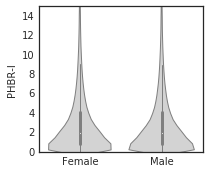

In [122]:
plt.figure(figsize=(3,2.5))
sns.violinplot(x='Sex', y='PHBR-I', data=sex_df, color='lightgrey')
plt.ylim(0, 15)
plt.xlabel('')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/PHBR_distribution.MHCI.pdf')

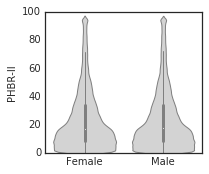

In [123]:
plt.figure(figsize=(3,2.5))
sns.violinplot(x='Sex', y='PHBR-II', data=sex_df, color='lightgrey')
plt.ylim(0, 100)
plt.xlabel('')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/sex/PHBR_distribution.MHCII.pdf')

In [60]:
sp.mannwhitneyu(sex_df[sex_df.Sex == 'Female']['PHBR-I'],
                sex_df[sex_df.Sex == 'Male']['PHBR-I'])

MannwhitneyuResult(statistic=2589912130264.0, pvalue=0.36852996614210926)

In [61]:
sp.mannwhitneyu(sex_df[sex_df.Sex == 'Female']['PHBR-II'],
                sex_df[sex_df.Sex == 'Male']['PHBR-II'])

MannwhitneyuResult(statistic=2585602101087.5, pvalue=0.00034824985069498176)

In [62]:
print sex_df[sex_df.Sex == 'Female']['PHBR-II'].mean()
print sex_df[sex_df.Sex == 'Male']['PHBR-II'].mean()

23.8037165363
23.8785247189


Tapasin

In [69]:
tap = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/TAPBP/expression_df.csv',
                 index_col=0)
tap.index = tap['Sample']

In [72]:
tap = pd.merge(tap[['TAPBP']], df[['gender']], right_index=True, left_index=True)

In [74]:
tap.head()

,TAPBP,gender
TCGA-02-0047,3.578368,MALE
TCGA-02-0055,5.227381,FEMALE
TCGA-02-2483,4.422219,MALE
TCGA-02-2485,5.120195,MALE
TCGA-02-2486,3.786360,MALE


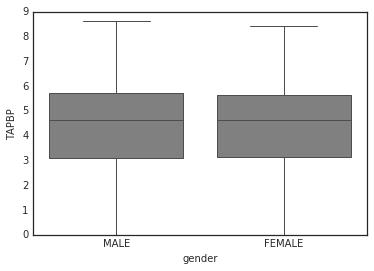

In [77]:
sns.boxplot(x='gender', y='TAPBP', data=tap, color='grey')

In [76]:
sp.mannwhitneyu(tap[tap.gender == 'FEMALE'].TAPBP,
                tap[tap.gender == 'MALE'].TAPBP)

MannwhitneyuResult(statistic=6978851.5, pvalue=0.21287172689433492)

Neoantigens

In [79]:
mutations_thresh = mutations[thresholded_mutations]

In [80]:
FI_values1, MI_values1, FII_values1, MII_values1 = [], [], [], []
FI_values0, MI_values0, FII_values0, MII_values0 = [], [], [], []
for mutation in thresholded_mutations:
    
    FI_values1.extend(list(FI[mutations_thresh[mutation].astype(bool)][mutation]))
    MI_values1.extend(list(MI[mutations_thresh[mutation].astype(bool)][mutation]))
    FII_values1.extend(list(FII[mutations_thresh[mutation].astype(bool)][mutation]))
    MII_values1.extend(list(MII[mutations_thresh[mutation].astype(bool)][mutation]))
    
    FI_values0.extend(list(FI[~mutations_thresh[mutation].astype(bool)][mutation]))
    MI_values0.extend(list(MI[~mutations_thresh[mutation].astype(bool)][mutation]))
    FII_values0.extend(list(FII[~mutations_thresh[mutation].astype(bool)][mutation]))
    MII_values0.extend(list(MII[~mutations_thresh[mutation].astype(bool)][mutation]))

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/cellar/

In [82]:
sex_df = pd.DataFrame({'Sex': ['Female' for x in FI_values0] + ['Male' for x in MI_values0] 
                            + ['Female' for x in FI_values1] + ['Male' for x in MI_values1],
                         'PHBR-I': FI_values0 + MI_values0 + FI_values1 + MI_values1,
                         'PHBR-II': FII_values0 + MII_values0 + FII_values1 + MII_values1,
                         'Mutation_status': ['No_mutation' for x in FI_values0 + MI_values0]
                                          + ['Mutation' for x in FI_values1 + MI_values1]})

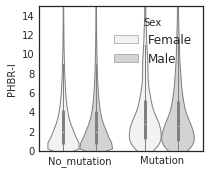

In [84]:
plt.figure(figsize=(3,2.5))
sns.violinplot(x='Mutation_status', y='PHBR-I', hue='Sex', data=sex_df, color='lightgrey')
plt.ylim(0, 15)
plt.xlabel('')
plt.tight_layout()

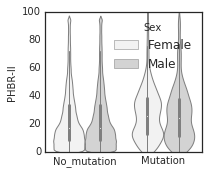

In [85]:
plt.figure(figsize=(3,2.5))
sns.violinplot(x='Mutation_status', y='PHBR-II', hue='Sex', data=sex_df, color='lightgrey')
plt.ylim(0, 100)
plt.xlabel('')
plt.tight_layout()

In [86]:
sp.mannwhitneyu(sex_df[(sex_df.Sex == 'Female')&(sex_df.Mutation_status == 'Mutation')]['PHBR-I'],
                sex_df[(sex_df.Sex == 'Male')&(sex_df.Mutation_status == 'Mutation')]['PHBR-I'])

MannwhitneyuResult(statistic=4206126.5, pvalue=0.0014146464899140315)

In [87]:
print sex_df[(sex_df.Sex == 'Female')&(sex_df.Mutation_status == 'Mutation')]['PHBR-I'].mean()
print sex_df[(sex_df.Sex == 'Male')&(sex_df.Mutation_status == 'Mutation')]['PHBR-I'].mean()

3.86165669071
3.81611242317


In [90]:
mutations_thresh.ix[fem].mean().mean()

0.0013828937179761764

In [91]:
mutations_thresh.ix[mal].mean().mean()

0.0012293178242086759